Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [60]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Fall 2019 - Assignment 3
## Counting Bloom Filters 

### *Assignment Overview*
For this assignment, you need to research an introduction to Counting Bloom Filters (CBFs),
which are data structures that extend the standard Bloom Filters. You will design and
implement in Python a set of CBFs initialized at a given false positive rate, and will need to
summarize your findings in a report.
Your task scheduler receives a list of tasks to be performed in a given amount of time.


### *Intended Style*
Your report needs to be written in the style of a chapter from the Cormen textbook (i.e.,
exhibiting academic rigor and clear explanations) or a Wikipedia page on the subject (i.e., a
general overview on a topic that will be peer-reviewed by the world-wide community). Thus,
your report needs to explain very well the concepts CBFs, details on your CBFs design, analysis
of your implementation and experimental results. Make sure you properly cite your sources of information.

### *Key Audience*
Your report must explain and demonstrate CBFs well to an academic and professional audience, from beginners to experts on the subject if Bloom filters. Assignment specific Tasks. Each of the questions below will be graded on the CS110 LOs included inside square brackets:

### Part 1: Attendance Check
**[#responsibility] [appropriate LO for the make-up work]**
Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 7.2(inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook.

![attendance check](attendance_check.png)

### Part 2: Textbook-style Introduction to CBFs
**[#ComputationalSolutions, #DataStructures, #ComplexityAnalysis]** 
Give an overview of the functionality of CBFs, listing all its operations (i.e., from initialize to indexing keys with a given false-positive rate). Give a few examples of computational applications that, in your consideration, can benefit from using CBFs. For every computational application, give meaningful explanations as to why it is a good candidate for CBF.

### Chapter Overview

This chapter introduces Counting Bloom Filters (CBFs), a new type of probabilistic data structure that supports fast membership lookup in a set. A narrative roadmap starts with the basic functionalities of standard Bloom Filters (BFs), its apparent advantages and lack of deletion, then gradually builds up key intuitions in CBFs, its key functions, math relations and time & space complexity. Applications of CBFs are given at the end.

### 2.1 Sunday picnic and scatterbrained mom

#### 2.1.1. A Story

         Today is a cloud-free Sunday, a mid-autumn delight. Leaves turning, birds chirping, life reaping as it is. Your family has decided to go for a picnic in the woods, and your little sister was too excited to sleep last night. You, a third-year CS student, pray to quench every single neuron firing python haystacks for the past five hours, once you lie yourself by the breezing river bank. Everyone seems to be red and ready, except your mother. 

        It is the forth time your mom shout out 'I am ready!', and you are not truly thrilled. For decades you love your mom so much, well, perhaps less on the scatterbrained half. Now you are sitting still, diligently digging items in-and-out of your mom's scarlet tote bag, a Christmas sack capable of devouring everything:
        
        'Hang on! where's my sunglasses?'
        'let me check....'
        
       (you pull out an item from the bottomless bag, see if it's sunglasses, 
       nope, then put it back.
       now another, check, not really, put back...
       
        'it's in your bag, mom.'
        'Ah, of course.' 
  
        'Did you see my Chamomile oil lip balm?'
        'checking...'
         (two minutes passed)
        'Just checked your bag, you got it.'
        'Sure.'
      
        'So, did I pack my pink-spotty napkins?'
        'wait...yup it's here.'
        'perfect.'
        'and selfie stick? also inside?'
        'hmmm let's see...
        '...nope, not yet.'
        'Oh lord, can't forget that one.'
        ...
        
        'Awesome, I'm ready! Let's go guys!'
        'Are you, ready?' you ask, 'like 'ready ready'?'
        'Yes, what else in the world could I have forgotten?'
        'well, then, let's head ...'
        'Oh gosh! My iphone!'
        
     So, your mom whirls upstairs once more, this time for her iphone. However your hand just touched on a glass screen at the bottom of her tote bag: again, the item she's looking for was already there. 
         

**Here is a question for you:**

*As a CS student, how could you find a smarter way to soothe your mom's worriness about forgetting an important personal item in her giant tote bag?* 

#### 2.1.2. Common data structures 
So far we have been quite satisfied at problem solving with arrays and lists, which are decent data structures that support item addition and lookup. However, as you have experienced from checking your mom's bottomless tote bag, the simple idea of going through 'tonnes' of items one-by-one fails blatantly as you will surely end with eye rashes and muscle strains. As we have learnt in previous chapters, the time complexity of checking an item in list takes O(n), which is far from efficiency. Moreover, there isn't a nicely-indexed 'list' of containers chained inside your mom's bag, so you cannot really retrieve her Maybelline lipstick by calling 'item 5'.

And here comes your new proposal: hash tables. 

Indeed, using hash tables would release you from the brute-force chore of item lookup. You may find helpful pulling out a piece of notebook paper, and record down each item's name acronym as your mom put it into the tote bag for the first time. Later on, as your mom ask for her 'lavendar-scented deoderant', you just convert the value 'lavendar-scented deoderant' into your self-designed hash function to get the correct hash key, say 'LVD_DEOD', and simply check if the key is recorded on your paper, all within a minute. A query search in hash table takes O(1), which is much better than O(n).

Next, as you reflect on the hash table structure, you realize that you still need the whole tote bag by your side, which takes much space, and wonder if there exist more space-efficient algorithms. On the other hand, as you closely observed your dear mom's whirling item-search behavior, you found that she would not even use 70% of all the items in tote bag anyways once out on a picnic. So, instead of a 100% guarantee achieved by lists and hash table, offering her a probabilistic answer that 'the item of interest is most likely there' will suffice, chances are that you can get away with falsely reporing an item that is not in the bag as 7 out of 10 times you mom would not check. 

Fortunately, there is a standard type of probabilistic data stucture called Bloom Filter (BF) which cousatisfactorily fulfill the core need of your mom's query.


### 2.2 What is a Bloom Filter (BF)? 

#### 2.2.1 Definition
         A Bloom Filter (BF) is a space-saving, time-efficient data structure that supports fast query on if an item is in a set. To be precise, Bloom Filters is a probabilistic data structure that returns either a 'possibly inside' or an 'absolutely not inside' response. In other words, the Bloom Filter will produce some false positives (i.e. report item found when item does not exist in set) due to hash collisions, but zero false negatives (i.e. report item not found when item exists in set) as any detection of a zero bit in hashed slot would return the query with a false.

The Bloom Filter properties would be a good fit to solve your mom's worriness as: 
1. it is reasonable to bet on some small false positives in exchange of a more efficient search over repetitive requests from your mom, since she will likely not retrieve the item of interest immediately for use, and still reporting an 'item found' has an extra benefit of soothing her nerves;<br>
<br>
2. it would have been a nightmare if false negatives are not prevented in the probabilistic setting : say you are not as attentive in item lookup and missed the item of interest while looping through all items or doing hash table checks, and report 'item not found' to your mom. Then your dear mother would initiate a blanket search through out the entire house to hunt down the 'item' for the next three hours, when in fact it is in her tote bag. You may then expect your family to reach the picnic site by sunset if not in moonlight.

The best thing about BF is that, unlike lists and hash tables, it does not store any items at all: it is simply a ledger that registrates everything added to the set, so highly space-efficient. Therefore, you could implement a BF with just a piece of paper without caring about the actual items or their arrangements in the tote bag!

So far so good. Let's check out how BF does the Jedi trick.

#### 2.2.2 Basic functions

In computer science, BFs are implemented as a bit array, that is an indexed list of 0s and 1s. The total number of bits used in a BF, denoted by *m*, is called the length of BF. 

Just like hash tables, BFs also use hash functions to convert an item value into a hash key, which is mapped onto a index in the BF bit array. On top of that, BFs seldomly use one hash function, but k hash functions to introduce information redundancy in recording an item's existance. 

    For example, given a 8-bit BF (*m* = 8), the same item 'hair comb' is hashed by first hash function H1 into index 3, by second hash funciton H2 into index 5, and by a third hash function H3 into index 6. Then the item 'hair comb' will be marked as existing in the set jointly by slot 3, 5, 6, in other words, slot 3,5 and 6 cocurrently witnessed 'hair comb's existance. Later, if anyone asserts 'hair comb's existance, this assertion can only be co-validated by all three slots.
    
Exactly how does BF do this joint marking? Let's talk about BF's basic functions:  

BFs support three basic functions: BF initializaiton, insertion and item lookup: 

    let's say we decide to use a 10-bit BF, with 3 independent hash functions. To implement the BF without your computer by hand is easy: you take out a piece of loose leaf paper and your hole punch from school bag, and draw some boxes to indicate bit array slots ( as a cs student, you have grown the good habit of 0 indexing). That's all you need.
    
<img src="paper_hole_punch.png" width="400" height='200'>

#### *1. Initialization*
The bit array is always initialized at zeros:  

<img src="BF_initialization.png" width="400" height='200'>

which just means that you draw out some red boxes on the paper margin to indicate bit slots:

<img src="hole_initial.png" width="400" height='200'>

 
#### *2. Insertion*
When an item is added, the item value is converted by all selected hash functions, each mapped onto an indexed position. Good hash functions will have a uniform distribution over its probability of hashing into each bit-array slot, and different hash functions should ideal return non-repetitive hash keys.

Here, let's say we want to add the item 'wallet' into the BF, and Hash_1(wallet) = 2,  Hash_2(wallet) = 8, Hash_3(wallet) = 5, then, we add 1 to each of the corresponding values in slot 2, 8, 5 of the BF array. 
<img src="BF_add_wallet.png" width="400" height='200'>

Practically, you simply punch a hole onto each of the red square 2, 8, and 5 on your paper margin:

<img src="hole_add_wallet.png" width="500" height='250'>


Next, we add a second item 'scarf', and our three hash functions return index 0, 5, 6 respectively. 

<img src="BF_add_scarf.png" width="400" height='200'>


**Notice** that the same slot 5 is registered twice by both added items, however BFs requires that any bit that has turned from 0 to 1 cannot reverse back to 0. Therefore subsequent hashing on a slot that is already filled by 1 is going to do nothing on the bit value.
This one-directional rule also implies that a slot can only be zero if it is never being hashed into. 

This is easily understood by looking at your paper margin:

<p style="text-align: center; ">***As you punch slot 5  for the second time, a hole is still a hole!***</p>
<img src="hole_add_scarf.png" width="500" height='250'>

However, for all other slots that do not have a hole yet, it is obvious that no punch has been applied, implying that a slot can only be zero if it is never being hashed into.  

#### *3. Lookup*
Now, the BF is going to do its intended job of a fast check if an queried item exists in the set (or in your case, your mom's bottomless tote bag)

To do so, the algorithm first take in the queried item, collect all hash keys by passing through the requested item value into each of the hash functions, then check if any of the indices contain zeros. If a zero is found, we can conclude that the item is definitely NOT inside the set, for the same reasoning in addition (zeros represent un-hashed terretories). 

<img src="napkin_NotIn.png" width="400" height='200'>

In your punch hole implementation, you simple check if any hashed slot does not have a hole in order to falsify an item's possible existance. For example, we can be 100% sure that 'napkin' is NOT inside mom's tote bag because slot 9 has not been punched a hole yet. 

<img src="hole_napkin_NotIn.png" width="500" height='250'>


On the other hand, if all hashed indices return 1s, it does not necessarily mean that the item is inside.Let's look at a pair of examples:

- first, a query on 'scarf' would return a true positive (that is, when all checked slots already have a hole on your paper margin):

<img src="scarf_inside.png" width="400" height='200'>

- but, it is possible that another new item, nail brush, which is hashed into 2,5 and 6, would 'fake' its positive existance by chance as the combination of hashed slots contain no zeros. This results in a case of false positive.

<img src="nail_brush_falsep.png" width="400" height='200'>

here, you are misled by the hole in slot 5 (which is punched by 'scarf' and 'wallet') into believing that 'nail brush', who shares a punch in slot 5 as well (due to hash collisions), is also inside the tote bag.

<img src="hole_nail_brush_falsep.png" width="500" height='250'>

Although we have argued that reporing some false positives does not matter much as long as we can make our mama worry-free, as chances are that she will not retrieve those queried items immediately, if not forever. However, we would still want to lower the false positive rate, FPR, as far as we can. Imagine how upset mom would become when she found out that her nail brush is not in the bag at the picnic: *She would lost all her fun glittering her little toes in the California sunshine!*

Therefore, it is worthwhile investigating the mathematical relationships of key variables on FPR.

#### 2.2.3  Mathematical relations among key variables

To control BF's false positive rate (FPR) we need to explicitly write out its functional relationships with key variables such as

    1) the length of bit array, m;  
    2) the number of hash functions k;
    3) total number of items added to the set, n;
  
Lets' denote the false positive rate as a probability *p*. Assume that hash functions are approximately independent from each other and each preserves a uniform distribution of hashing into 1 of m bit array slots, then 
- the expected probability that 1 of m slots is hashed into by 1 of k hash functions is $\frac{1}{m}$, i.e. the probability of marking a 1; 
- which means the probability of a bit staying zero is $1-\frac{1}{m}$;
- we have k hash functions, the joint probability of a single bit not being hashed into after k hashing attempts upon one insertion is  $(1-\frac{1}{m})^k$;
- and the probability of a single bit to stay zero after n insertions would be  $(1-\frac{1}{m})^{kn}$;
- since a bit can only be 0 or 1, the corresponding probability of a single bit to become 1 after n insertions would be $1-(1-\frac{1}{m})^{kn}$;
- now if we wonder if an item is NOT in set after n insertions, we would hash the new items k times through k different hash functions, each with a probability of $1-(1-\frac{1}{m})^{kn}$ of becoming 1, and compute the joint probability of all k bits hashed into are already set to 1;
- BF will falsely return a 'likely inside' if all k checked slots contain 1s, and this FPR probability is expressed as $(1-(1-\frac{1}{m})^{kn})^k$, 

<p style="text-align: center; ">
$(1-(1-\frac{1}{m})^{kn})^k \approx (1-e^{-kn/m})^k$ </p>

('Bloom Filters', n.d.)

From the mathematical relations, we would expect the false positive rate to decrease as we 

- increase m (the length of bit array) and 
- decrease n (the number of inserted items)
    
The relationship between false positive rate and number of hash functions is more complex:  as k increases, the inner term $e^{-kn/m}$ tends to zero, i.e. the term $1-e^{-kn/m}$ tends to increase to 1 (but always less than 1). However, raising a base less than 1 to a large power (k) would result in an overall decrease of the false positive rate. So the combined tug-of-war effects of k will determine the behavior of FPR, given constant $n$ and $m$.

This motivate us to find a general formula of an optimum number of hash functions that minimize FPR at any given set of m and n. 

According to Pagh, Pagh & Rao (2005), the optimal number is given by
<p style="text-align: center; ">
$k = \frac{m}{n} (\ln{2})^2$   </p> 

remember that k must be a positive integer.  
<br>
Next, if we plug in the optimal number of hash functions back to the maths expression of FPR, we get the optimal (minimum) false positive rate we can get at given m and n: 

<p style="text-align: center; ">
$\ln{p} = -\frac{m}{n}(\ln{2})^2$ </p>

rearrange the terms, we can also get the optimal length of bit array as 

<p style="text-align: center; ">
$m =  -\frac{n\ln{p}}{(\ln{2})^2}$ </p>

if we divide both sides by n,we will get the optimized, average number of bits shared to one inserted item: 

<p style="text-align: center; ">
$\frac{m}{n}=  -\frac{\ln{p}}{(\ln{2})^2}$ </p>

now, if we substitute $\frac{m}{n}$ back to $k = \frac{m}{n} (\ln{2})^2$, we get the direct relation bewteen the number of hash fucntions, k, and the false positive rate: 

<p style="text-align: center; ">
$k = \frac{\ln{p}}{\ln2} = -log_2p$ </p>

These formula are very handy in designing the BF structure by careful choices of m, n and k, to approximately achieve a target low false positive rate.

#### 2.2.4 Time and space complexity

BFs achieves a high efficiency in allocation of both time and space resources. For a BF of k hash funcitons:

- BFs only does k comparison of hash key and bit values, therefore has a time complexity of O(k), where k is a constant much smaller than the length of bit array m, and the total number of inserts n, which outperforms any array-based indexing methods;
- although hash tables is more superior in time complexity at O(1), it uses up much more space, O(n), than BFs, who only uses O(m) where m is normally a small integer. So BFs are more time efficient.

#### 2.2.5 A request of deletion

Everything looks good so far, Bloom Filters might just be the ideal data structure we want to implement for utmost efficiency. However, here comes a new problem.

    Your mom asked you to check if she had put her waterlily wallet in the bag, you got the request, computed all hash values, 2, 8, and 5, sure, all three indices return 1s, so you reported 'yes it's inside.' However, mom shook her head and sigh: 'Oh no that was my petty purse for grocery shopping only, not enough money inside to cover our picnic trip. Please help me to take it out.' 

This is a new type of request, and you did not think much at the beginning. You conceive of deletion as the reverse of addition, so you believe that, insteading of flipping 0s to 1s, you could flip 1s to 0s, and the item is removed from the bag:

<img src="scarf_remove.png" width="400" height='200'>

However, this deletion has negative impact on future queries. Let's say your mom had been really forgetful and asked you if she took her scarf for the second time. As you follow the lookup routine, you would surprisingly find out that the scarf is 'gone' when in fact it is still in the bag:

<img src="false_negative.png" width="400" height='200'>

after resetting all hashed indices of the removed item to zero, slot 5, which has been hashed in twice by 'scarf' and 'wallet', lost its validation capacity for proving 'scarf's existance. Therefore, the BF property of impossible false negative is violated. So in general, BF always refuse a deletion request (does not support that function at all).

But you should never refuse your dear mom's request: 

       Imagine that your neurotic mother is anticipating to take back her grocery wallet and put in a new one with credit card so she can buy you and your sister quality toys along the trip. But you just shrug your shoulders and throw back your line of punches:
       
       "Uh-uh, not an option mother. A hole is a hole, once punched in, never grows back. Don't you dare to mess up all my bloom filters!"
       
<img src="punchline.png" width="500" height='250'>     

Well, that was rough. 

It turns out that computer scientists also cannot put up with BF's lack of deletion, and they managed to do some genetic editing on BF to allow free deletion. 

### 2.3 Counting Bloom Filters (CBFs) saves the day 

#### 2.3.1 Definition

      Counting Bloom Filters (CBFs) are essentially an extended branch of standard Bloom Filters family that supports item deletion. Rather than using a bit array, CBFs uses an array of counters, each hold some small, non-negative integers. Instead of setting a ceiling at 1 for every bit slot, CBFs use a 'counter' that increment itself by 1 each time the slot is hashed by a function for a new insertion, and decrement by 1 each time if the item is deleted. CBFs inherit most structures and properties from Bloom Filters, and is also efficient in time. However, unlike BFs that uses only m bits, CBFs suffer from waste of memory spaces even at small bit counts due to a sparse array with many zeros.
      
As you reflect on your punchline loophole, you reconceptualize the item registration process, and come up with an ingenious idea of 'match counting' instead of hole punching. The idea is very simple: Rather than making a permanent hole that is impossible to recover, why don't you fetch a bunch of idle match boxes from your dad's garage, empty the boxes and represent each hash as one match stick. Then, everytime a slot is hashed into, you add that match stick into the corresponding match box.

<img src="five_match_sticks.png" width="400" height='200'>  

#### 2.3.2 Key functions

#### *1. Initialization*
Same as BF, start with only zeros. However, be minded that this array is no longer a bit array, but a count array. In your conext, you would empty ten match boxes (that each has a limited capacity of storing, say, 5 matches) and align them on the table.

<img src="match_initial.png" width="560" height='280'>  

#### *2. Insertion*
CBFs improve on BFs mainly in the way that added items are recorded on the ledger: if the same slot is hashed in twice over a temporal sequence, then the count increments to 2 instead of being capped at 1 in BF.

Let's use the same toy example as in BF: first insert 'wallet', second insert 'scarf'

<img src="BF_add_wallet.png" width="400" height='200'>

<img src="CBF_add_scarf.png" width="400" height='200'>

*Notice* here slot 5 records a 2 instead of 1, corresponding to 2 matches inside match box 5.

<img src="match_addition.png" width="500" height='250'>  

#### *3. Lookup*
Due to the different recording rules, we now check if all hashed slots have values greater than zero (instead of just looking for 1s). In your match-box implementation, you simple check if all hashed match boxes still have matchsticks inside. If none of the boxes is empty, you may confidently report that the item is most likely inside the tote bag.

Since the lookup time (access time) only depends on number of checked match boxes, which in turn depends only on the number of hash functions, k, you use to convert a query into counter index, the time complexity remains O(k), regardless of total number of items stored.

**Case of true positive:**
<img src="CBF_check_scarf.png" width="400" height='200'>
<br>
*matchbox equivalent:*
<img src="match_scarfHere.png" width="600" height='300'>
<br>
**Case of true negative:**
<img src="CBF_check_napkin.png" width="400" height='200'>
*matchbox equivalent:*
<img src="match_napkinNotHere.png" width="600" height='300'>

<br>
**Case of false positive:**
<img src="CBF_check_nailBr.png" width="400" height='200'>
<br>
*matchbox equivalent:*
<img src="match_nailbrushHere.png" width="600" height='300'>


#### *4. Deletion*
Here is what makes CBF most superior than BF: since every single hash is recorded by an increment of 1 on the CBF, i.e. the sum of all slot values must equal $n*k$ where $n$ is the number of items added and $k$ the number of hash functions used. This imply that each registration is independent and removing an item would not affect counts/records of other added items' existence status. The idea of independence is easily understood in the match-box analogy: Taking out one match stick which 'belongs' to 'wallet' would never make other sticks of other categories in the same match box disappear.

<img src="still_sticks.png" width="400" height='200'>

We can verify by current example of removing wallet from a two-item CBF:

<img src="CBF_deletion.png" width="400" height='200'>

Here, slot five remains a positive count = 1, indicating that there exist another item that shares this hash slot with the item 'wallet'.
In your match-box implementation of CBFs, you'd be pleased to find out that there is still a match left after removal:


<img src="still_a_stick.png" width="600" height='300'>

Now if we were to query on scarf again, we would not get a false negative anymore:

<img src="CBF_q_aft_del.png" width="400" height='200'>

#### 2.3.3 Mathematical relations

CBFs preserve basic data structures and hashing rules of BFs: 
- the idea of bit array is equivalent to the count array of positive integers and the length stays $m$; 
- the number of inserted elements is still denoted as $n$;  
- the number of hash function chosen is still denoted $k$;

therefore the false postiive rate probability $p$ holds the same relations with $m, n, k$, please refer to section 2.2.3 for a recap.

***Limit***: As Fan (2000) suggested, since each counter has a limited bit capacity, thus a q-bit counter will overflow if it reaches a value of $q^2$. 

#### 2.3.4 Time and space complexity

CBFs is time and space efficient for similar reasons as BFs . For a BF of k hash funcitons:

- CBFs also only does k comparisons, that is, if k hashed slots have a positive integer rather than zeros, therefore it also has a time complexity of O(k), where "k is a constant irrespective of the cardinality of the set"(Guo et al, 2010). ; <br>
<br>
- However, by storing actual counts instead of a binary bit, CBF does take up much more spaces than BFs. Bonomi and his colleagues (September 2006) have argued that "using counters of four bits blows up the required space by a factor of four over a standard Bloom filter, even though most entries are zero." Advanced techniques such as the spectral BF is designed to improve on this (Cohen & Matias, 2003)

#### 2.3.5 Applications of CBFs
CBFs are widely implemented in various tech and non-tech fields, some prominant cases are: 

- Blockchain data security over high-performance frequent transactions depends on its public consensus by all nodes in the smart contract (Zheng, 2017), and CBF is a handy tool to maintain a distributed ledgering system while allowing fast and accurate memebership identity verification. For example, Chen and his team (2018) presented their design of Certchain in which a DCBF-Dual CBF is used to eliminate false positives in public and efficient certificate audits.

- CBFs are frequently used in networking device algorithms in fields of accounting monitoring, load balancing, caching and policy enforcement, routing etc. Due to its fast membership check and simple implementation, it is widely used to check how many packets are queued,if a given state is reached or IP lookups (Fan et al., 2000; Ficara et al., 1977-1978)

- Applications in data management is ample in terms of malware detection, flagging and deletion. For example, Google Chrome implemented CBFs to flag malicious contents if an exact match between hashed values and a signature of safe contents. If no exact match, the content can be blocked and removed from the web (Erdogan & Cao, 2007). 

### Part 3: Python Implementation of CBFs
**[#DataStructures, #PythonProgramming, #CodeReadability]** Implement in Python 3 your designed CBFs data structure and all its properties. Make sure you carefully organize your Python code, write meaningful comments, and provide a thorough justification for your choice of hash functions. Meaning, why did you think a particular hash function is a good hash function in the context of CBFs.

In [61]:
import numpy as np
import mmh3

class CountingBF:

    def __init__(self, p, n):  

        # initialize a CBF with target false positive rate, and
        # expected total number of items to store in a set
        
        # apply the optimal formula outlined in Chapter section 2.2.3
        # to design an CBF with optimal count-array length (m) and and 
        # optimal number of hash functions (k)
        
        # optimal number of counters: m = -n*lnp / (ln2)^2
        self.m = -int(np.around(n * np.log(p) / (np.log(2) ** 2)))
        self.array = [0] * self.m
        # optimal number of hash functions: k = -log2p
        self.k = int(np.around(np.log(p)** 2))  
     
    def get_hashvalue(self, item, i):
        '''
        *** choice of hash functions ***
        This is a generalizable list of k hash functions as k varies
            a. for simple implementation, the python library mmh3 is used
            b.  the variation is introducted by hashing on the power of index i as well 
            
        the built-in hash satisfies criteria for good hashing into bit array:
        1. it approximates a uniform distribution so every slot is equally likely to be hashed into
        2.  by using hash_f index i as the seed for mmh3, we could vary hash functions and 
            make sure they are independent of each other
        3. mmh3 is non-cryptographic therefore fast in computing

        '''
        hashvalue = mmh3.hash(item, i) % self.m
        
        return hashvalue
    
    # add an element through k number of hashesand update counters CBF
    def insert(self, item):
        for i in range(0,self.k):
            h = self.get_hashvalue(item, i)
            self.array[h] += 1

    # check if the set contains an element
    def lookup(self, item):
        for i in range(0,self.k):
            h = self.get_hashvalue(item, i)
            if self.array[h] == 0:
                return False
        return True

    # delete an element from the set using CBF
    def delete(self, item):
        if self.lookup(item) == False:
            # nothing is deleted if an item does not exist
            return
        for i in range(0,self.k):  
            h = self.get_hashvalue(item, i)
            # decrease the hashed counter by 1 
            self.array[h] -= 1

    

In [62]:
# simple test cases:
# set a FPR = 10%, for 7 inserted elements 
cbf = CountingBF(0.1, 7)
print('Create a CBF with 10% FPR for 7 elements')
print(f'  {cbf.k} hash funtions needed')
print(f'  {cbf.m} counters needed')
print(' ')
cbf.insert("f")
cbf.insert("g")
cbf.insert("b")
cbf.insert("c")
cbf.insert("d")
cbf.insert("w")
cbf.insert("e")
cbf.insert("q")


print('counter array after insertions: ')
print(cbf.array)

# true positives
print(' ')
print('   True positives:')
print(cbf.lookup("q"))
print(cbf.lookup("b"))

# true negative
print(' ')
print('   True negatives:')
print(cbf.lookup("l"))
print(cbf.lookup("m"))


#false positives
print(' ')
print('   False positive:')
print(cbf.lookup("h"))


Create a CBF with 10% FPR for 7 elements
  5 hash funtions needed
  34 counters needed
 
counter array after insertions: 
[0, 1, 0, 0, 4, 3, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 3, 1, 0, 0, 0, 0, 3, 1, 0, 1, 4]
 
   True positives:
True
True
 
   True negatives:
False
False
 
   False positive:
True


### Part 4:  Analysis of Computational Behavior
Using your own Python implementation from question 3, generate data to push into the
CBFs. Provide an analysis, both on theoretical grounds and using experimental
corroboration, of how your implementation scales in terms of:
    
    a. [#DataStructures] Memory size as a function of the false-positive rate
    
    b. [#DataStructures] Memory size as a function of the number of items stored
    
    c. [#DataStructures, Access time as a funciton of the false-positive rate
    
    d. [#DataStructures, #ComplexityAnalysis] Access time as a function of the number of items stored

In [63]:
#import 
import matplotlib.pyplot as plt
import numpy as np
import random
import string

# create a random generator of strings
def random_string(length):
    s = ''
    for i in range(0, length):
        s += random.choice(string.ascii_lowercase)
    # combine each lowercase character togehter
    return s

**a.  Memory size as a function of the false-positive rate**

Text(0, 0.5, 'Memory size')

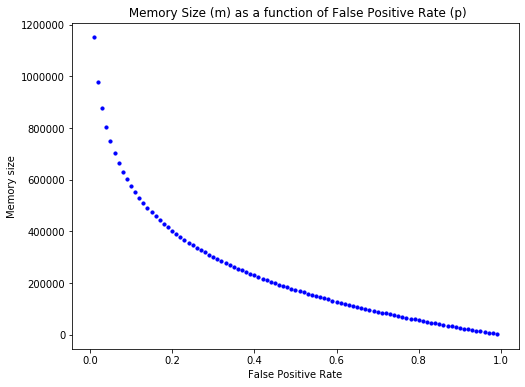

In [64]:
%matplotlib inline

# a list of p values (FPRs)
FPRs=[]
# a list lf m values (memory size == length of counter array)
mem_size=[]

# initiate a large number of items to store
n = 120000

for p in range (1,100):
    FPRi = p/100
    FPRs.append(FPRi)
    # for fixed number of input 
    cbfi = CountingBF(FPRi,n)  
    mem_size.append(cbfi.m)

# plot results
plt.figure(figsize=(8,6))
plt.scatter(FPRs,mem_size,c='b', s=10)

plt.title(' Memory Size (m) as a function of False Positive Rate (p)')
plt.xlabel('False Positive Rate')
plt.ylabel('Memory size')


#### Comment 1: 

Theoretically: $m = -\ln(p)\frac{n}{\ln(2)^2}$, 

If n is fixed, as p increases from 0 to 1, lnp grows from negative infinity to 0, the array size m grows with the negation of lnp (given the '-' sign in the formula), which should decrease from positive infinity to zero. Thus, to lower p, we want to increase memory size. 

**b.  Memory size as a function of the number of items stored**

Text(0, 0.5, 'Memory size (m)')

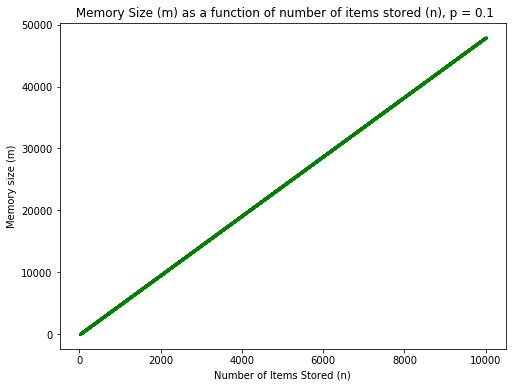

In [65]:
# a list lf n values (input size)
ns=[]
# a list of m values (memory size)
mem_size=[]

# initiate a large number of items to store
p = 0.1

for n in range(10,10000):
    ns.append(n)
    # for fixed number of input 
    cbfi = CountingBF(p,n)  
    mem_size.append(cbfi.m)

# plot results
plt.figure(figsize=(8,6))
plt.scatter(ns,mem_size,c='g', marker='o', s=2 )


plt.title(' Memory Size (m) as a function of number of items stored (n), p = 0.1')
plt.xlabel('Number of Items Stored (n)')
plt.ylabel('Memory size (m)')

#### Comment 2: 

Theoretically: $m = n\frac{-\ln(p)}{\ln(2)^2}$, it is obvious that memory size grows linearly with input size. In fact the gradient value should be $\frac{m}{n}=  -\frac{\ln{p}}{(\ln{2})^2}$ </p> (lnp is negative, so slope positive)

**c. Access time as a funciton of the false-positive rate**

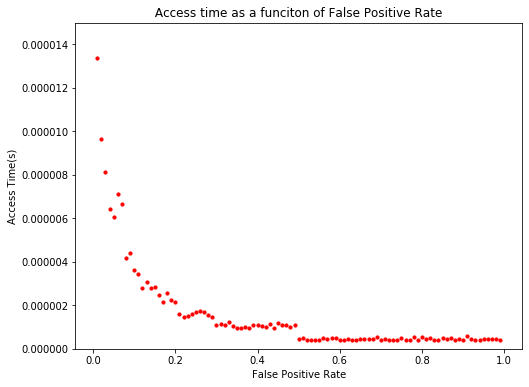

In [66]:
import time

# a list of false positive rates
pos_rate = []
# a list of access time
access_time = []
# set the number of items stored to 10000
n = 10000

for p in range (1,100):
    # for each FPR, compute ave access time of 1 out of n stored items
    FPRi = p/100
    pos_rate.append(FPRi)
    cbfi = CountingBF(FPRi,n)
    
    randomStr =[]
    # store n random strings 
    for i in range(1,n):
        st = random_string(10)
        randomStr.append(st)
        cbfi.insert(st)  # insert a random string
    
    sum_time = 0   
    st_time = time.time()
    for st in randomStr:
    # compute the total access time of lookup n queried item
        cbfi.lookup(st) # access the stored string
        
   # compute averaget time for accessing one item     
    time_used = time.time()-st_time

    average_time = time_used/n

    access_time.append(average_time)
    
    
# plot
plt.figure(figsize=(8,6))
plt.scatter(pos_rate,access_time,c='r', s=10)
plt.ylim(0, 1.5e-5)
plt.xlabel('False Positive Rate')
plt.ylabel('Access Time(s)')
plt.title(' Access time as a funciton of False Positive Rate ')

plt.show()

#### Comment 3: 

The experimental results show that, below a threshold of p=0.5, as we try to decrease false positive rate, the access time increases  rapidly; however, the access time stays zero after FPR becomes too high (a random guess would take 50% chance of getting right) since the optimal number of hash functions becomes 0.

Theoretically the he access time for CBF is O(k) which is determined by the number of hash funcitons k. According to the optimal relations betweek k and p: $k=-\ln{p}$, k increases as p decreases. We shall compare the empirical results with this theoretical relation between k and p, for p < 0.5, and see if the same decaying relation is found.


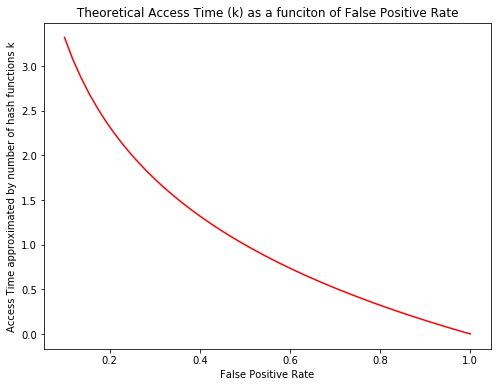

In [67]:
# plot  k = -ln(p)
plt.figure(figsize=(8,6))
x = np.linspace(0.1,1,50)
plt.plot(x, -np.log2(x),c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Access Time approximated by number of hash functions k')
plt.title(' Theoretical Access Time (k) as a funciton of False Positive Rate ')

plt.show()

#### Conclusion:
We have verified the experimental relation with the theoretical one above. More independent and uniform distributed hash functions we introduce to the CBF, less hash collisions will we have, therefore a smaller false positive rate. However the same inverse relationship between k and p can be also interpreted this way: as we try to minimize false positive rate, we have to bear the cost of increasing time in hashing (as access time grows with k) during the lookup process.

**d. Access time as a function of the number of items stored**

Text(0.5, 1.0, 'Access time as a function of the number of items stored')

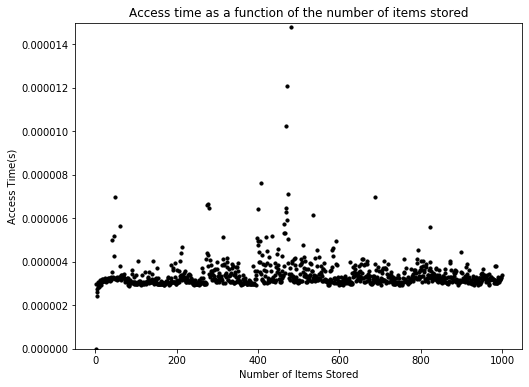

In [68]:
ns = [] #  a list of input size
access_time = []

# set false positive rate to a fix value
p = 0.1

for n in range (1,1000):
    ns.append(n)
    
    cbfi = CountingBF(p,n)
    
    randStrings = []
    for i in range(1,n):
        st = random_string(10)
        randStrings.append(st)
        cbfi.insert(st)
    
    sum_time=0
    for st in randStrings:
    
        st_time = time.time()
        cbfi.lookup(st)
        t = time.time()-st_time
        sum_time += t
        
    average_time = sum_time/n
    access_time.append(average_time)
    

# plot
plt.figure(figsize=(8,6))
plt.scatter(ns,access_time,c='black', s=10)
plt.ylim(0, 1.5e-5)
plt.xlabel('Number of Items Stored')
plt.ylabel('Access Time(s)')
plt.title('Access time as a function of the number of items stored')

#### Comment 4:
For a targeted FPR, the number of hashes is determined by -log2(k), which makes k also a fixed value. Therefore n is independent of k given a fixed p. Theoretically this relationship should be represented by a horizontal line. Here, the scattered plot largely agree with this independence nature between n and p despite a small percentage of outliers.

### Part 5:  False Positive Rate Inspection
**[#ComputationalCritique]** Produce a plot to show that your implementation’s false
positive rate matches the theoretically expected rate.

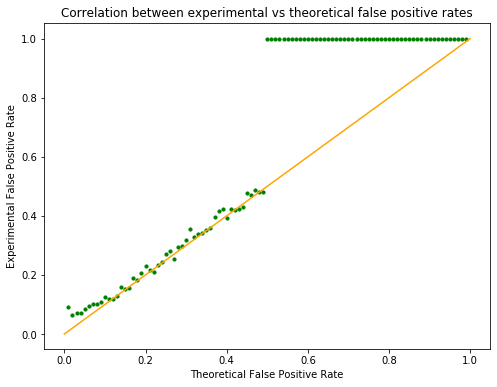

In [70]:
%matplotlib inline

# set total number of items to be stored (Fixed)
n=1000

# initiate a list of experimental false positive rates
experimental_ps=[]
# a list of theoratical false positive rates
theoratical_ps=[]

# calculate experimental false positive rate
for p in range(1,100):
    # theoratical positive rates: 0.01 -- 1.00
    FPR_i = p/100
    theoratical_ps.append(FPR_i)
    
    # create a CBF object at expected FPR rate and input size n 
    cbfi = CountingBF(FPR_i,n)
    
    # insert n randomly generated items in
    for i in range(1,n):
        cbfi.insert(random_string(100))
    
    # generate another n false items not stored in list and check their existence
    # should all return false if there is no false positivity.
    
    num_true = 0  # count number of true returns
    lkp=[] # to collect boolean lookup evaluations
    for i in range(1,n):
        lkp.append(cbfi.lookup(random_string(100)))
    num_true = sum(lkp)  # count total number of true returns
    
    experimental_p_i = num_true/n  # calculate ith experimental FPR
    experimental_ps.append(experimental_p_i) # append to corresponding list


# plot correlation between theoretical and empirical results
plt.figure(figsize=(8,6))
plt.scatter(theoratical_ps,experimental_ps, c='g',  s = 10)
x = np.linspace(0,1,50)
plt.plot(x,x, c='orange')  # perfect agreement at r=1 

plt.title('Correlation between experimental vs theoretical false positive rates')
plt.xlabel('Theoretical False Positive Rate')
plt.ylabel('Experimental False Positive Rate')

plt.show()


#### Comment 5: 
As we can see from the graph, the theoretical vs empirical FPRs highly agree with each other below certain threshold as the green scatters closely cluster around the red line of perfect agreement (slope = 1), (around 0.5).  This makes sense as CBFs is useful only if false positive rates remain as low as possible. However, if FPR is higher than 50%, a probabilistic lookup would not even beat a random guess, thus lose the very purpose of a lookup function. 

### Part 6:  Corner Cases
**[#ComputationalCritique]** Identify and list (if any) corner cases for CBFs

As Bonomi et al (2006) argued, CBFs does take up much memory spaces and only allows small counters, thus numerical overflow is quite likely once implemented to register tonnes of data from say a big bank or healthcare records. 

Also, as Part4.d shows, CBFs becomes useless if we set p > 0.5 as the experimental FPRSs becomes 1. 

Moreover, although by design CBFs can never have a false negative, emprical results have show that false negatives often exists. Guo and his colleagues (2010) investigated the root cause of having false negatives, and reported that the incorrect deletion of a false positive item is the root cause of having false negatives. This error negatively impact CBF's efficiency in the same way by decrementing counter values. 

### Appendix A: HCs

- **audience**: I intended to write a textbook style introduction to cs students who just started their journey with data structures and have only limited expereinces with indexing techniques, I addressed readers as 'you' through out the textbook chapter so it creates a more intimate and supporting tutoring environment for readers of rudimentary level to follow. My narration also targets common experiences in a student's life, which hopefully hooks reader attention right from beginning.

- **composition**: I created a novel narrative of 'sunday picnic with scatterbrained mom' to walk through important concepts and ideas of an otherwise technical topic on BFs and CBFs, my choice of dictions are figurative, yet my explanations stay clear and concise with a sinse of humor (i.e. the story of 'refusing mom's request for a removal of her wrong wallet), the integrated experience facilitate readers to catch the nuances and beauty of CBFs without losing academic rigor.

- **analogies**: I provided two analogies, 'hole punches' and 'match sticks', to illustrate key concepts of BFs and CBFs respectively.These analogies correctly map the key structures and properties of an abstract data type to concrete daily experiences and facilitate detailed derivation of computational solutions (showing how replacing boolean recorder with counters solve the deletion problem).

- **visualziations**: sufficient and accurate visual illustrations of CBF & BF structures and processes are provided in figures. All figures are originally designed using graphing tools in Mac Keynote and google slide. 

### Appendix B: Reference list
- Bonomi, F., Mitzenmacher, M., Panigrahy, R., Singh, S., & Varghese, G. (2006, September). An improved construction for counting bloom filters. In European Symposium on Algorithms (pp. 684-695). Springer, Berlin, Heidelberg.
- Bloom Filter. (n.d.). In Wikipedia. Retrieved November 3, 2019, from
   https://en.wikipedia.org/wiki/Bloom_filter
- Chen, J., Yao, S., Yuan, Q., He, K., Ji, S., & Du, R. (2018, April). CertChain: Public and efficient certificate audit based on blockchain for TLS connections. In IEEE INFOCOM 2018-IEEE Conference on Computer Communications (pp. 2060-2068). IEEE.
- Cohen, S., & Matias, Y. (2003, June). Spectral bloom filters. In Proceedings of the 2003 ACM SIGMOD international conference on Management of data (pp. 241-252). ACM.
- Erdogan, O., & Cao, P. (2007). Hash-AV: Fast Virus Signature matching by Cache-Resident Filters. Int. J. Secur. Netw, 2, 50-59.
- Fan, L., Cao, P., Almeida, J., & Broder, A. Z. (2000). Summary cache: a scalable wide-area web cache sharing protocol. IEEE/ACM Transactions on Networking (TON), 8(3), 281-293.
- Ficara, D., Di Pietro, A., Giordano, S., Procissi, G., & Vitucci, F. (2010). Enhancing counting bloom filters through huffman-coded multilayer structures. IEEE/ACM Transactions on Networking (TON), 18(6), 1977-1987.
- Guo, D., Liu, Y., Li, X., & Yang, P. (2010). False negative problem of counting bloom filter. IEEE transactions on knowledge and data engineering, 22(5), 651-664.
- Pagh, A., Pagh, R., & Rao, S. S. (2005, January). An optimal Bloom filter replacement. In Proceedings of the sixteenth annual ACM-SIAM symposium on Discrete algorithms (pp. 823-829). Society for Industrial and Applied Mathematics.
- Zheng, Z., Xie, S., Dai, H., Chen, X., & Wang, H. (2017, June). An overview of blockchain technology: Architecture, consensus, and future trends. In 2017 IEEE International Congress on Big Data (BigData Congress) (pp. 557-564). IEEE.
